In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

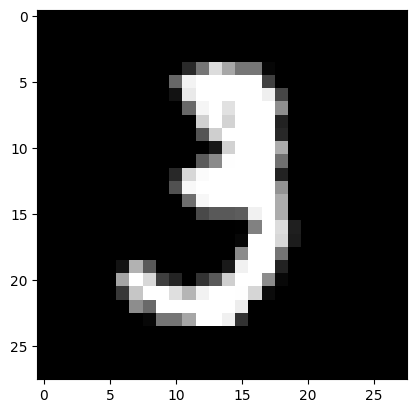

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10], cmap='gray')
plt.show()

# Preprocessing

In [ ]:
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# Model Definition

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3),
                              activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,810 (971.91 KB)

 Trainable params: 248,810 (971.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 174ms/step - accuracy: 0.6644 - loss: 0.9926 - val_accuracy: 0.9725 - val_loss: 0.0832
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.9577 - loss: 0.1448 - val_accuracy: 0.9812 - val_loss: 0.0559
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 169ms/step - accuracy: 0.9701 - loss: 0.1054 - val_accuracy: 0.9848 - val_loss: 0.0491
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - accuracy: 0.9770 - loss: 0.0842 - val_accuracy: 0.9874 - val_loss: 0.0403
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - accuracy: 0.9800 - loss: 0.0691 - val_accuracy: 0.9889 - val_loss: 0.0341
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 167ms/step - accuracy: 0.9842 - loss: 0.0568 - val_accuracy: 0.9902 - val_loss: 0.0318
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.9849 - loss: 0.0527 - val_accuracy: 0.9911 - val_loss: 0.0281
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.9871 - loss: 0

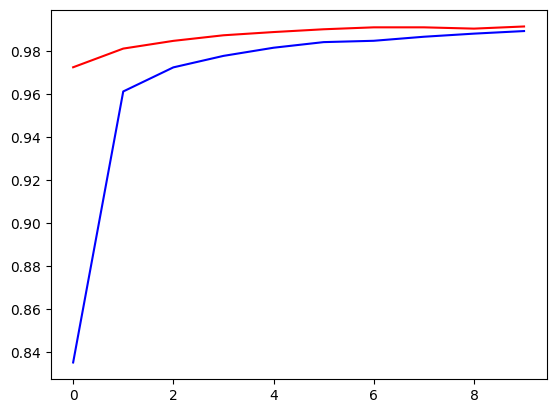

In [ ]:
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')